# Drexel University
## College of Computing and Informatics
## INFO 212: Data Science Programming I
## Assignment 2
### Due Date: Sunday, Nov. 3rd, 2024
### This assignment counts for 15% of the final grade

### A. Assignment Overview
This assignment provides the opportunity for you to practice with Python data analysis skills.

### B. What to Hand In

Sumbit a completed this Jupyter notebook.

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Your Name: Ethan Weggel




# Question [100 points]:

## Data Set to Use:
Download the data file "winemag-data-130k-v2.csv" and load it into a Pandas DataFrame using the column 0 as index. This data set contains 130k reviews for different wine verieties. It has the following columns:

1.	country: The country where the wine is from.
2.	description: A description or review of the wine.
3.	designation: The vineyard within the winery where the grapes that made the wine are from.
4.	points: The number of points WineMag rated the wine on a scale of 1-100.
5.	price: The cost for a bottle of the wine.
6.	province: The province or state where the wine is from.
7.	region_1: The wine-growing area in the province or state.
8.	region_2: Sometimes there are more specific regions specified within a wine-growing area.
9.	taster_name: Name of the taster.
10.	taster_twitter_handle: Twitter handle for the taster.
11.	title: The title of the wine review, which often contains the vintage.
12.	variety: The type of grapes used to make the wine.
13.	winery: The winery that made the wine.

In [30]:
import pandas as pd #importing pandas as pd
import matplotlib.pyplot as plt #importing matplotlib.pyplot as plt
from IPython.display import display #importing IPython.display so we can print multiple dataframes in one data nicely

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Info212/Week 5/winemag-data-130k-v2.csv")

## Data Analysis Task Description:
You are asked to use the dataset to identify the most promising country, region, and wine variety for launching a new winery. You will make a recommendation supported by visualizations and data analysis results.

## Data Analysis Activities:
Complete the following list of activities for the data analysis task. To complete each activity,
**You must write code or small programs with the following requirements:**
1. **write a description about what you are going to do**
2. **write the code with necessary comments**
3. **run the code to generate results**
4. **explain the results and plots in detail in separate Text cells**

1. Analyze the number of wine reviews by country and region. Can you estimate the market sizes of countries and regions? Is there any information about consumer interests that can be extracted from the review descriptions?

PLAN:

Wine Review by Country and Region:
For this task, my goal is to plot the number of wine reviews per country and per region. In order to do this I will use pandas to extract the unique countries, then for each country find the number of reviews. For each region I will see how many reviews there are as well. Then I will plot each country and region on the x axis ticks and the number of reviews on the y axis using a bar plot. I will use matplotlib.

Market Size Estimation:
I will be using pandas to extract the average wine price per country and region and then multiplying that by the number of reviews in each to see how much money is in the market for each category.

Review Description Analysis:
I will use NLTK to get polarity of the customer reviews for winerys for sentiment analysis. Then based on these analysis' I will be able to plot which winerys are popular as well as which words are used most frequently in their descriptions.

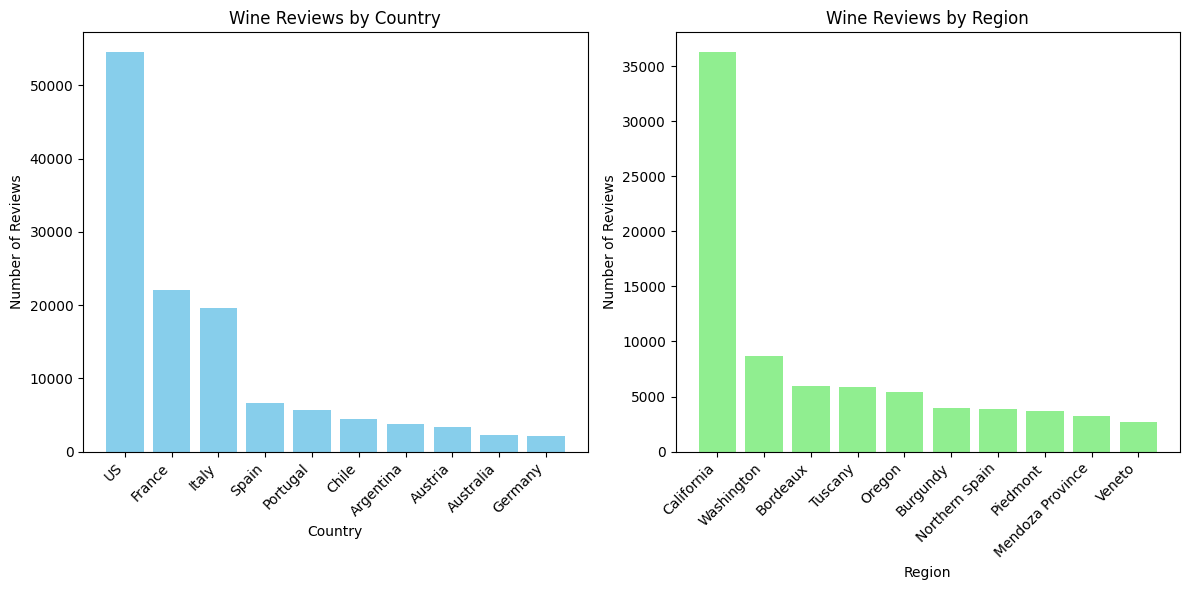

In [24]:
# PLOTTING REVIEWS FOR COUNTRY AND REGION
reviewsByCountry = df['country'].value_counts().head(10) #getting the number of reviews per country name, then getting the top ten
reviewsByRegion = df['province'].value_counts().head(10) #getting the number of reviews per province/general region, then getting top ten

plt.figure(figsize=(12, 6)) #setting up a plot figure

plt.subplot(1, 2, 1) #specifying the country subplot
plt.bar(reviewsByCountry.index, reviewsByCountry.values, color='skyblue') #setting the subplot as a barplot using the country names on x and reviews on y
plt.title("Wine Reviews by Country") #setting plot title
plt.xlabel("Country") #setting x label
plt.ylabel("Number of Reviews") #setting y label
plt.xticks(rotation=45, ha="right") #setting x tick angle

plt.subplot(1, 2, 2) #specifying the region subplot
plt.bar(reviewsByRegion.index, reviewsByRegion.values, color='lightgreen') #setting the subplot as a barplot using the region names on x and reviews on y
plt.title("Wine Reviews by Region") #setting plot title
plt.xlabel("Region") #setting x label
plt.ylabel("Number of Reviews") #setting y label
plt.xticks(rotation=45, ha="right") #setting x tick angle

plt.tight_layout() #settings graphs next to each other with no overlap
plt.show() #show graph


ANALYSIS:

In terms of wine reviews by country, the United States has the highest number of wine reviews by a large margin. This suggests that the US has a larger review culture or the sample taken contains more reviews from the US. France, Italy and Spain are large followers which tracks well with their histories of making wine, but the culture of reviewing might not be as prominent.

In terms of wine reviews by region, California dominates the graph, which is also in the US so this correlation makes sense (especially because of Napa County). Washington is a close second which suggests that both coasts of the US are interested in reviewing wines. Bordeaux, Burgundy and Tuscany are further down, but this tracks with country ratings. This might suggest the market is smaller in Europe or there are not as many wineries, even though the quality might differ.

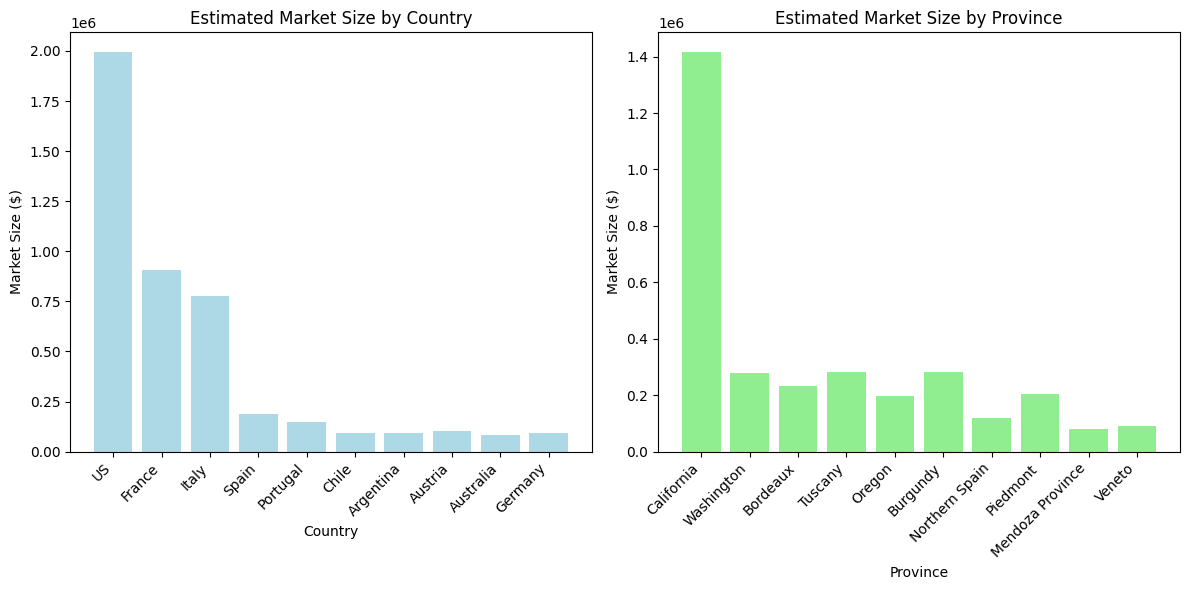

In [45]:
# GETTING THE POTENTIAL MARKET SIZE PER COUNTRY BASED ON REGION PRICE

averagePriceByCountry = df.groupby('country')['price'].mean()  # Calculate average price per country
averagePriceByProvince = df.groupby('province')['price'].mean()  # Calculate average price per region

reviewsByCountry = df['country'].value_counts().head(10)  # Getting the number of reviews per country
reviewsByProvince = df['province'].value_counts().head(10)  # Getting the number of reviews per region

marketSizeByCountry = reviewsByCountry * averagePriceByCountry[reviewsByCountry.index]  # Estimating market sizes using average prices
marketSizeByProvince = reviewsByProvince * averagePriceByProvince[reviewsByProvince.index]  # Estimating market sizes using average prices

marketSizeCountryDF = pd.DataFrame({'Country': reviewsByCountry.index, 'Market Size ($)': marketSizeByCountry})  # Converting to country dataframe for better visualization and use
marketSizeProvinceDF = pd.DataFrame({'Province': reviewsByProvince.index, 'Market Size ($)': marketSizeByProvince})  # Converting to province dataframe for better visualization and use

# PLOTTING MARKET SIZE FOR COUNTRIES AND PROVINCES

plt.figure(figsize=(12, 6))  # Set up the figure size for the plots

# Plotting market size by country
plt.subplot(1, 2, 1)  # Create subplot for country
plt.bar(marketSizeCountryDF['Country'], marketSizeCountryDF['Market Size ($)'], color='lightblue')  # Bar plot for country
plt.title("Estimated Market Size by Country")  # Set title for country subplot
plt.xlabel("Country")  # Set x-axis label for country
plt.ylabel("Market Size ($)")  # Set y-axis label for country
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

# Plotting market size by province
plt.subplot(1, 2, 2)  # Create subplot for region/province
plt.bar(marketSizeProvinceDF['Province'], marketSizeProvinceDF['Market Size ($)'], color='lightgreen')  # Bar plot for region
plt.title("Estimated Market Size by Province")  # Set title for region subplot
plt.xlabel("Province")  # Set x-axis label for region
plt.ylabel("Market Size ($)")  # Set y-axis label for region
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.tight_layout()  # Ensure no overlap between the plots
plt.show()  # Display the plot

ANALYSIS:

From these dataframes, the US has the largest market size at nearly 2 million. California is definitely the biggest contributor towards this. France and Italy also have significant markets, though far smaller than that of the US. Regions like Bordeaux, Tuscany and Burgundy do have relatively large or concentrated market sizes which highlights their importance. Areas like Chile, Argentina and Australia are smaller but modest market sizes, showing their contributions and even indicating niche or emerging markets.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top words for Gilles Morat: fresh(4), fine(2), bright(2), acidity(2), grapefruit(2), finishing(2), fruits(1), good(1), lively(1), character(1)

Top words for Logowines: yes(1), elegance(1), well(1), rich(1), fruit(1), sweet(1), perfumed(1), juiciness(1), attractively(1), fruity(1)

Top words for Thibert Père et Fils: lively(2), fresh(1), side(1), crisp(1), bright(1), acidity(1), green(1), fruits(1), run(1), well(1)

Top words for Jean-Claude du Roure: full(1), mouth(1), ripe(1), wine(1), showing(1), great(1), bright(1), white(1), fruits(1), vibrant(1)

Top words for Quinta das Tecedeiras: good(2), fine(1), balanced(1), wine(1), brings(1), toastiness(1), alongside(1), sweet(1), ripe(1), fruit(1)

Top words for YN: sugary(1), sweet(1), medicinal(1), like(1), cherry(1), cough(1), syrup(1)

Top words for Laurens: classy(1), package(1), bright(1), flavorful(1), sparkling(1), wine(1), vivacious(1), creamy(1), flavors(1), creating(1)

Top words for Sortina: fresh(2), ripe(1), richly(1), conc

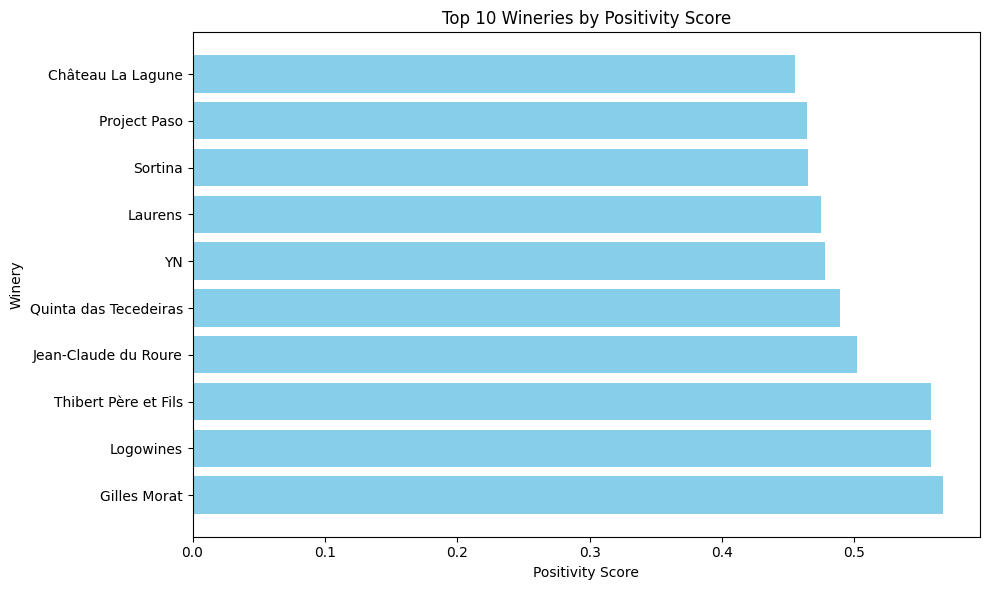

In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer #importing SentimentIntensityAnalyzer for scoring
from nltk.corpus import stopwords #importing stopwords so we know when to tokenize
from nltk.tokenize import word_tokenize #importing word_tokenize so we can tokenize
from collections import Counter #getting a counter for word frequency
import nltk #import nltk so we can use nltk operations freely

nltk.download('vader_lexicon') #download standard words
nltk.download('punkt') #download language add on
nltk.download('stopwords') #download stopwords for tokenization

sia = SentimentIntensityAnalyzer() #instantiating a new SentimentIntensityAnalyzer
stop_words = set(stopwords.words('english')) #getting all unique stop words in english

df['positivity_score'] = df['description'].apply(lambda d: sia.polarity_scores(d)['pos']) #making new column of positivity ratings based on the positive polarity scores
top_10_wineries = df.groupby('winery')['positivity_score'].mean().nlargest(10) #getting the winerys with the top 10 highest ratings

def get_frequent_words(descriptions): #defining function to get frequency of words
    words = word_tokenize(' '.join(descriptions).lower()) #tokenizing words
    return Counter([w for w in words if w.isalpha() and w not in stop_words]).most_common(10) #getting frerquency dictionary with counter

frequent_words = {w: get_frequent_words(df[df['winery'] == w]['description']) for w in top_10_wineries.index} #using a dictionary comprehension with previous function

for winery, words in frequent_words.items(): #iterating through all key, value pairs in our dictionary comprehension results
    print(f"\nTop words for {winery}:", ', '.join([f"{w}({c})" for w, c in words])) #printing the results for frequent words

plt.figure(figsize=(10, 6)) #making a new plot figure
plt.barh(top_10_wineries.index, top_10_wineries.values, color='skyblue') #make new plot a bar chart that is horizontal
plt.title('Top 10 Wineries by Positivity Score') #setting title
plt.xlabel('Positivity Score') #setting x axis label
plt.ylabel('Winery') #setting y axis label
plt.tight_layout() #keeping relevant entities close together with no overlap
plt.show() #showing the graph


ANALYSIS:

The top ten wineries are Gilles Morat, Logowines, Thibert Père et Fils, Jean-Claude du Roure, Quinta das Tecedeiras, YN, Laurens, Sortina, Project Paso, Château La Lagune from the dataset judging from their positivity scores. In general based on the data, Words like 'fresh', 'bright' and 'elegant' come up freqently showing that customers wines with vibrant, crisp and fresh qualities above all else. Moreover, terms like "sweet" and "rich" appear for Quinta das Tecedeiras and Project Paso, suggesting that customers also enjoy wines with ripe fruit flavors and a sweet finish

2. Analyze the average rating by country and region. Based on the insights and other relevant informamtion available in the data set, describe reputation of winery locations.

PLAN:

 For this task, my goal is to plot the average rating per country and per region. In order to do this I will use pandas to extract the unique countries, then for each country find the average rating number. For each region I will see the average as well. Then I will plot each country and region on the x axis ticks and the averages on the y axis using a bar plot. I will use matplotlib.

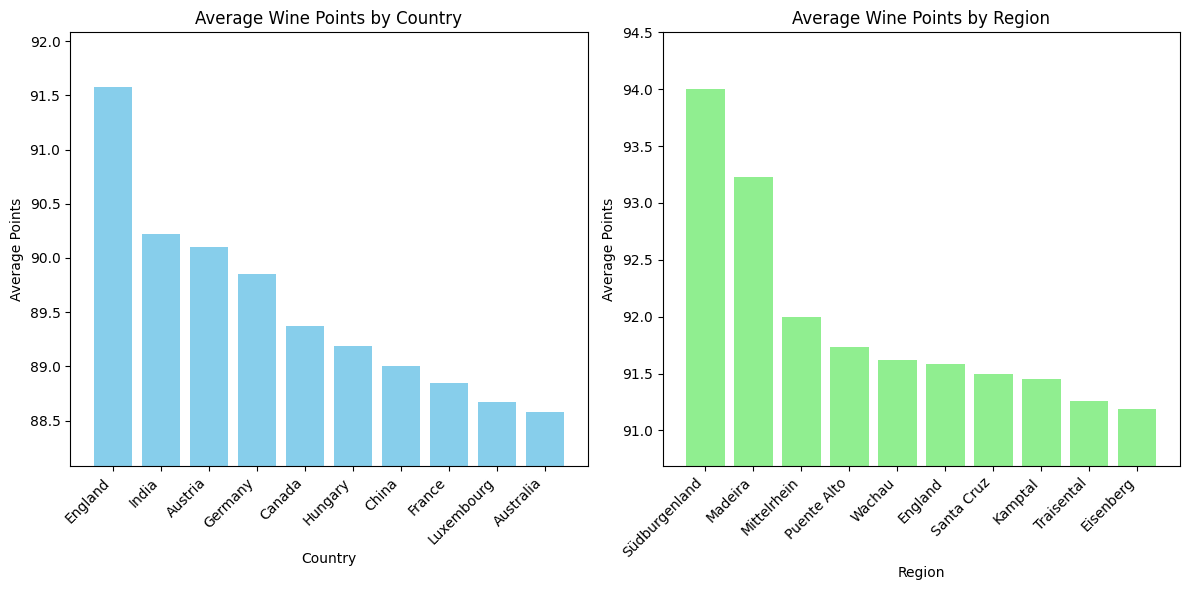

In [35]:
# PLOTTING AVERAGE POINTS PER COUNTRY AND REGION (WITH ADJUSTED SCALES)
avgPointsByCountry = df.groupby('country')['points'].mean().sort_values(ascending=False).head(10) # getting the average points per country, then top ten
avgPointsByRegion = df.groupby('province')['points'].mean().sort_values(ascending=False).head(10) # getting the average points per region, then top ten

plt.figure(figsize=(12, 6)) # setting up a plot figure

plt.subplot(1, 2, 1) # specifying the country subplot
plt.bar(avgPointsByCountry.index, avgPointsByCountry.values, color='skyblue') # barplot with country names on x and average points on y
plt.ylim([avgPointsByCountry.min() - 0.5, avgPointsByCountry.max() + 0.5]) # setting y-axis limits for better visibility of differences
plt.title("Average Wine Points by Country") # setting plot title
plt.xlabel("Country") # setting x label
plt.ylabel("Average Points") # setting y label
plt.xticks(rotation=45, ha="right") # setting x tick angle

plt.subplot(1, 2, 2) # specifying the region subplot
plt.bar(avgPointsByRegion.index, avgPointsByRegion.values, color='lightgreen') # barplot with region names on x and average points on y
plt.ylim([avgPointsByRegion.min() - 0.5, avgPointsByRegion.max() + 0.5]) # setting y-axis limits for better visibility of differences
plt.title("Average Wine Points by Region") # setting plot title
plt.xlabel("Region") # setting x label
plt.ylabel("Average Points") # setting y label
plt.xticks(rotation=45, ha="right") # setting x tick angle

plt.tight_layout() # setting graphs next to each other with no overlap
plt.show() # show graph

ANALYSIS:

England, both as a country and a region, as well as Sudbergenland, Madeira and Mittelrhein all have consistently high-rated wines which enhances their reputation for consistency and popularity. On the other hand, while countries like Australia and Luxembourg have lower averages than that of England, regions like Puente Alta and Wachau stand out for for high-quality wines that might make the areas more popular or well-known for wine making. Much more prestigious wineries like Château La Lagune and Gilles Morat cointinue to have consistently high rated wines which only add to the regions renowned popularity for wine making.

3. Analyze wine varieties that consistently receive higher ratings across different regions. Based on the insights and other relevant information in the data set, describe popularity and consumer preference.

PLAN:

For this task, my goal is to plot the ratings across regions. In order to do this I will use pandas to extract the unique regions, then for each find the rating. Then I will plot each country and region on the x axis ticks and the average ratings on the y axis using a bar plot. I will use matplotlib.

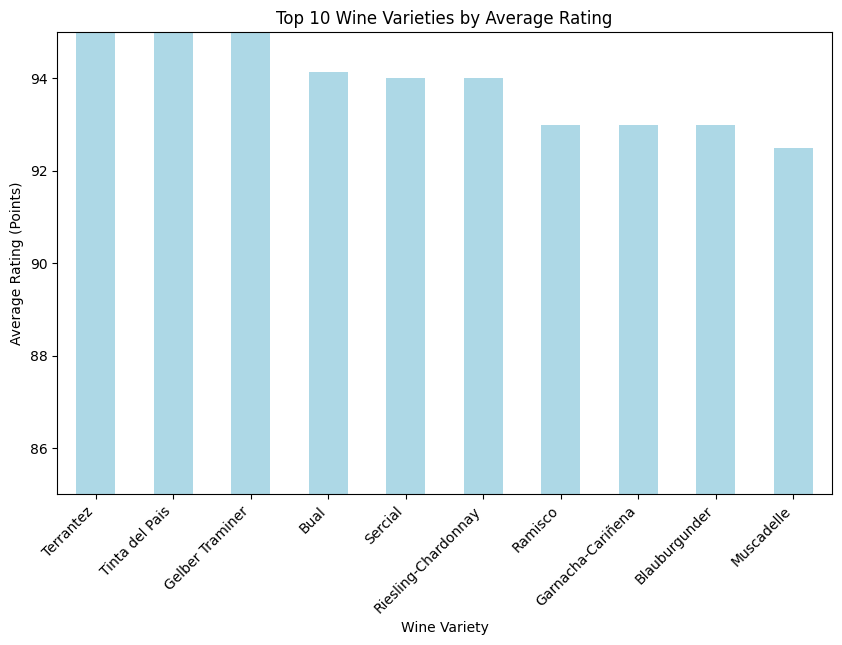

In [41]:
# PLOTTING WINE VARIETIES ACROSS REGIONS
average_rating_by_variety = df.groupby('variety')['points'].mean().sort_values(ascending=False) #grouping by wine variety and calculating the average rating for each variety

top_varieties_by_rating = average_rating_by_variety.head(10) #displaying the top 10 wine varieties by average rating

plt.figure(figsize=(10, 6))  #creating a figure for the plot
top_varieties_by_rating.plot(kind='bar', color='lightblue', title='Top 10 Wine Varieties by Average Rating')  #plotting data with light blue bars
plt.xlabel("Wine Variety")  #setting x-axis label
plt.ylabel("Average Rating (Points)")  #setting y-axis label
plt.xticks(rotation=45, ha='right')  #rotating x-axis ticks by 45 degrees for better readability
plt.ylim(85, 95)  #adjusting y-axis limits for better visibility of differences
plt.show()  #displaying the plot


ANALYSIS:

According to the graph showing the top ten varieties (by average) across all regions, it is clear some varieties like Terrantez, Tinta del País, and Gelber Traminer are consistently receiving higher ratings. These are likely produced in limited regions are fronting a strong reputation among tasters. Varieties like Riesling-Chardonnay, Ramisco, and Bual are also highly rated which could suggest their versalitiy or appeal across different wine regions. Given their high ratings, these varieties likely cater to people who prioritize quality and distinct characteristics over acccessibility. These insights suggest that top-rated varieties are not just regional specialties but also reflect global preferences for high-quality, unique wines.

4. Analyze the wine prices by country, region, and variety. Based on the insights and other relevant information in the data set, describe the potential profitability and market positioning of the wines based on their countries, regions, and varieties.

PLAN:

For this task, my goal is to plot the average price across countries and regions. In order to do this I will use pandas to extract the unique countries and regions, then for each find the averages for each. Then I will plot each country and region on the x axis ticks and the average ratings on the y axis using a bar plot. I will use matplotlib and only plot the top ten for both.

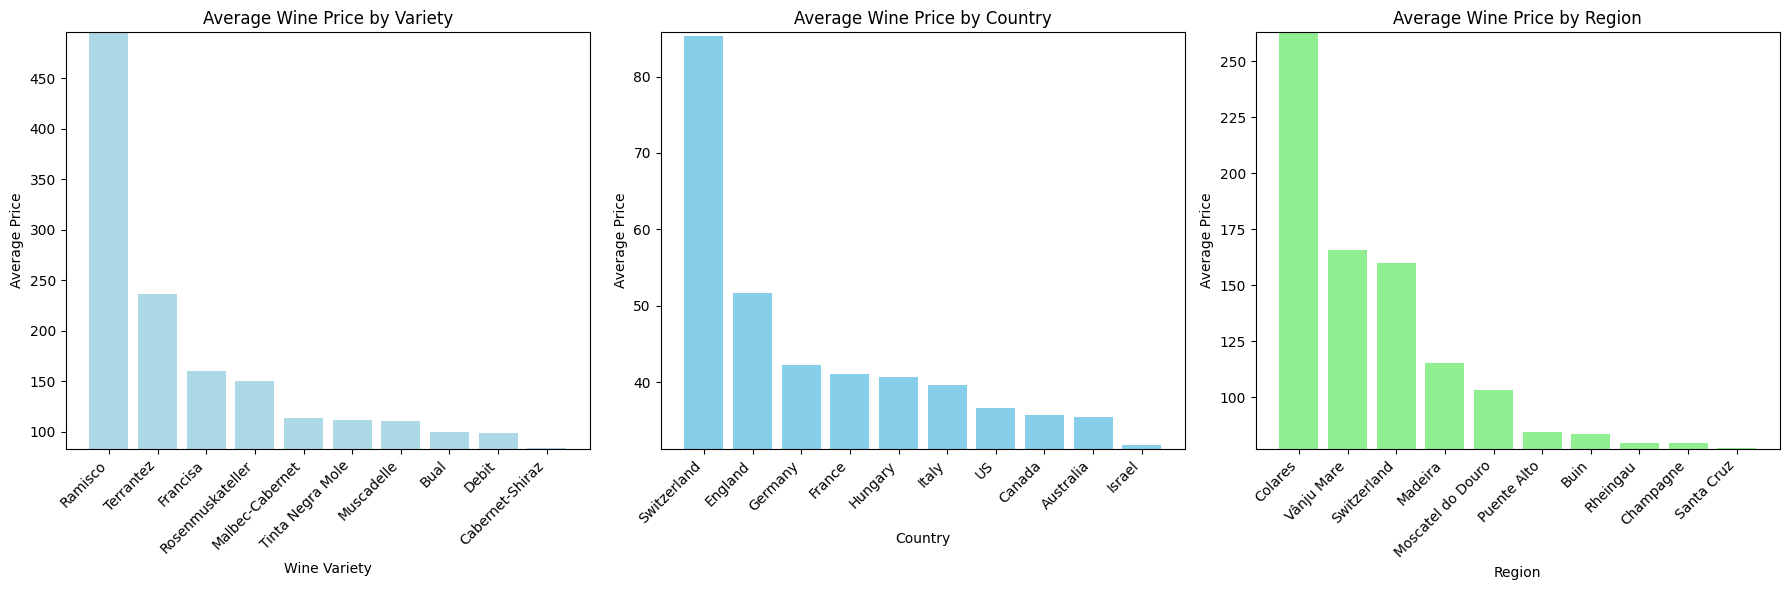

In [44]:
# PLOTTING AVERAGE PRICE PER VARIETY, COUNTRY, AND REGION (WITH ADJUSTED SCALES)
avgPriceByVariety = df.groupby('variety')['price'].mean().sort_values(ascending=False).head(10) #getting the average price per wine variety, then top 10

avgPriceByCountry = df.groupby('country')['price'].mean().sort_values(ascending=False).head(10) #getting the average price per country, then top 10

avgPriceByRegion = df.groupby('province')['price'].mean().sort_values(ascending=False).head(10) #getting the average price per region, then top 10

plt.figure(figsize=(18, 6))  #setting up a larger figure to fit three plots

# Plot for Average Wine Price by Variety
plt.subplot(1, 3, 1)  # specifying the variety subplot
plt.bar(avgPriceByVariety.index, avgPriceByVariety.values, color='lightblue')  #barplot with variety names on x and average price on y
plt.ylim([avgPriceByVariety.min() - 0.5, avgPriceByVariety.max() + 0.5])  #setting y-axis limits for better visibility
plt.title("Average Wine Price by Variety")  #setting plot title
plt.xlabel("Wine Variety")  #setting x-axis label
plt.ylabel("Average Price")  #setting y-axis label
plt.xticks(rotation=45, ha="right")  #setting x-axis tick rotation

# Plot for Average Wine Price by Country
plt.subplot(1, 3, 2)  #specifying the country subplot
plt.bar(avgPriceByCountry.index, avgPriceByCountry.values, color='skyblue')  #barplot with country names on x and average price on y
plt.ylim([avgPriceByCountry.min() - 0.5, avgPriceByCountry.max() + 0.5])  #setting y-axis limits for better visibility
plt.title("Average Wine Price by Country")  #setting plot title
plt.xlabel("Country")  #setting x label
plt.ylabel("Average Price")  #setting y label
plt.xticks(rotation=45, ha="right")  #setting x tick angle

# Plot for Average Wine Price by Region
plt.subplot(1, 3, 3)  #specifying the region subplot
plt.bar(avgPriceByRegion.index, avgPriceByRegion.values, color='lightgreen')  #barplot with region names on x and average price on y
plt.ylim([avgPriceByRegion.min() - 0.5, avgPriceByRegion.max() + 0.5])  #setting y-axis limits for better visibility
plt.title("Average Wine Price by Region")  #setting plot title
plt.xlabel("Region")  #setting x label
plt.ylabel("Average Price")  #setting y label
plt.xticks(rotation=45, ha="right")  #setting x tick angle

plt.tight_layout()  #ensuring proper layout with no overlap
plt.show()  #displaying the plot

ANALYSIS:

By variety, wines like Ramisco and Terrantez have exceptionally high prices that suggest they belong to a luxury market. By country, Switzerland stands out as the highest average wine price. However countries like the US and Canada have significantly lower prices, indicating a broader, more accessible market unlike Switzerland. Regionally speaking, Colares and Vânju Mare have mmuch higher prices suggesting that they are premium, sought after and or niche wines. These insights suggest that wines from exclusive regions and varieties are positioned as luxury items with high profitability potential, while those from more accessible regions and countries cater to a larger market, prioritizing volume and wider consumer reach.

## Final Recommendataion:
**Finally, you will write recommendations for launching a new winery.** Based on the above data analysis, recommend a country, region, and wine variety that offers the best balance of market size, reputation, profitability, consumer interests, and competitive positioning for launching a new winery. Be sure to support all selections, recommendations, and answers with relevant visualizations or evidence from your data analysis. You may reuse descriptions, code, visualizations, and results from the previous analysis, as well as any additional analyses you perform.

PLAN:

I plan to show five different visualizations to support my analysis below. All of these visualizations exist and support my claims so I feel no need for further analysis.

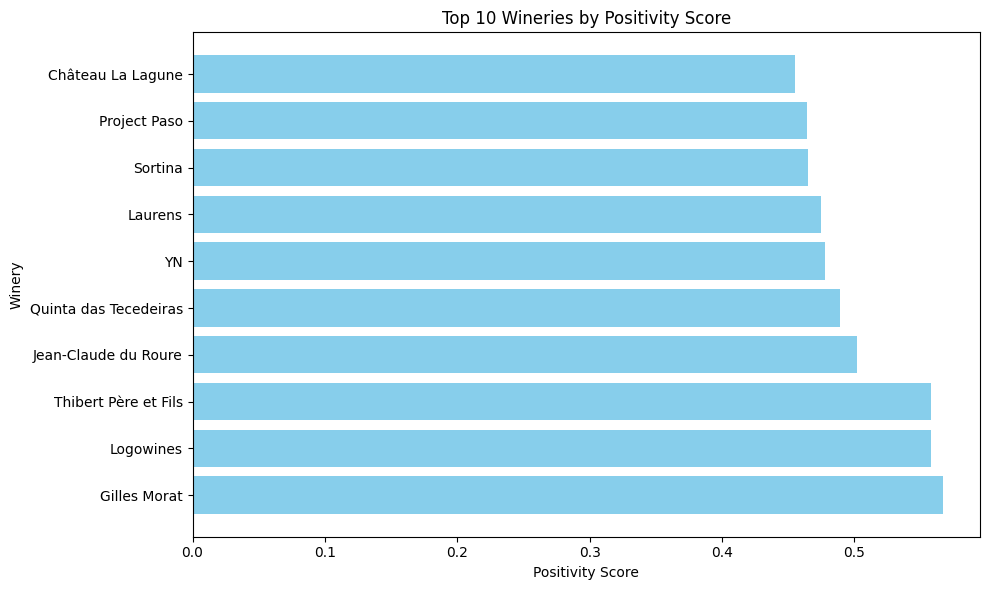

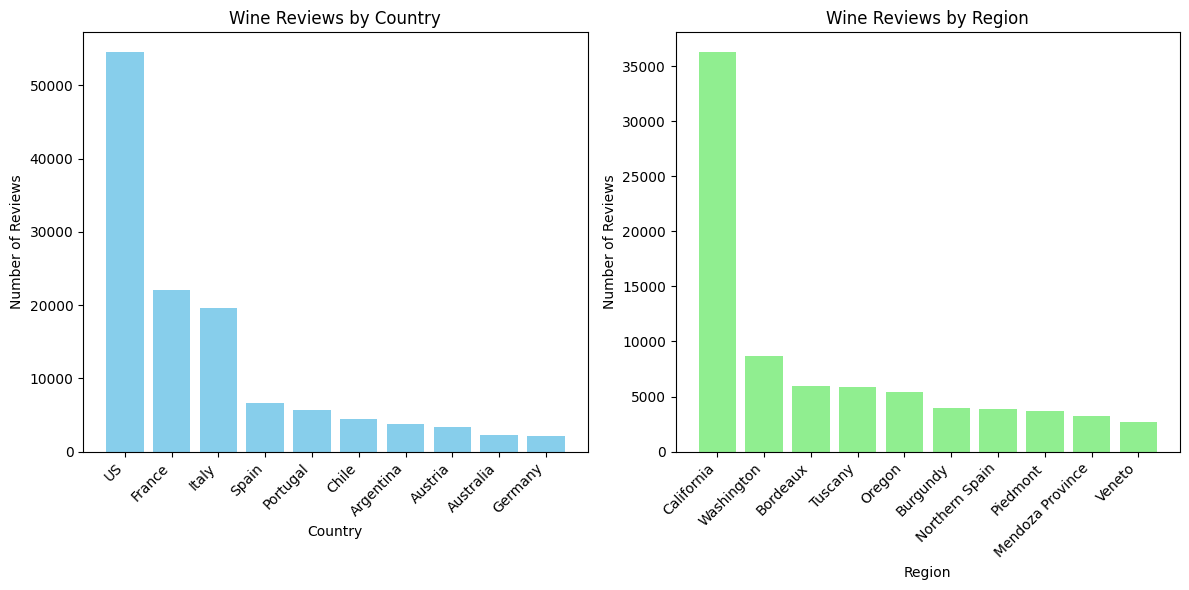

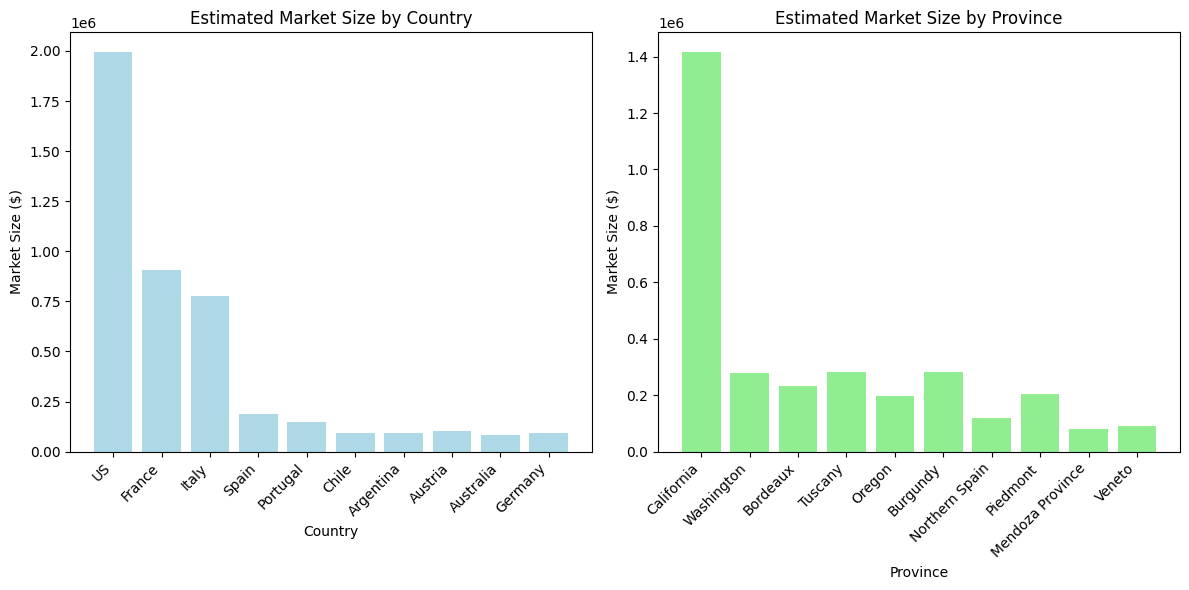

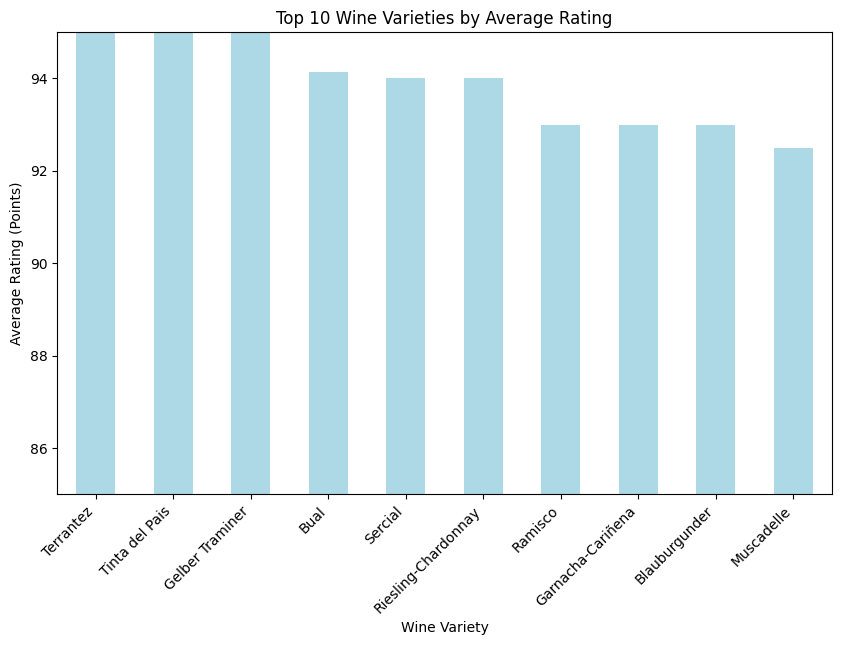

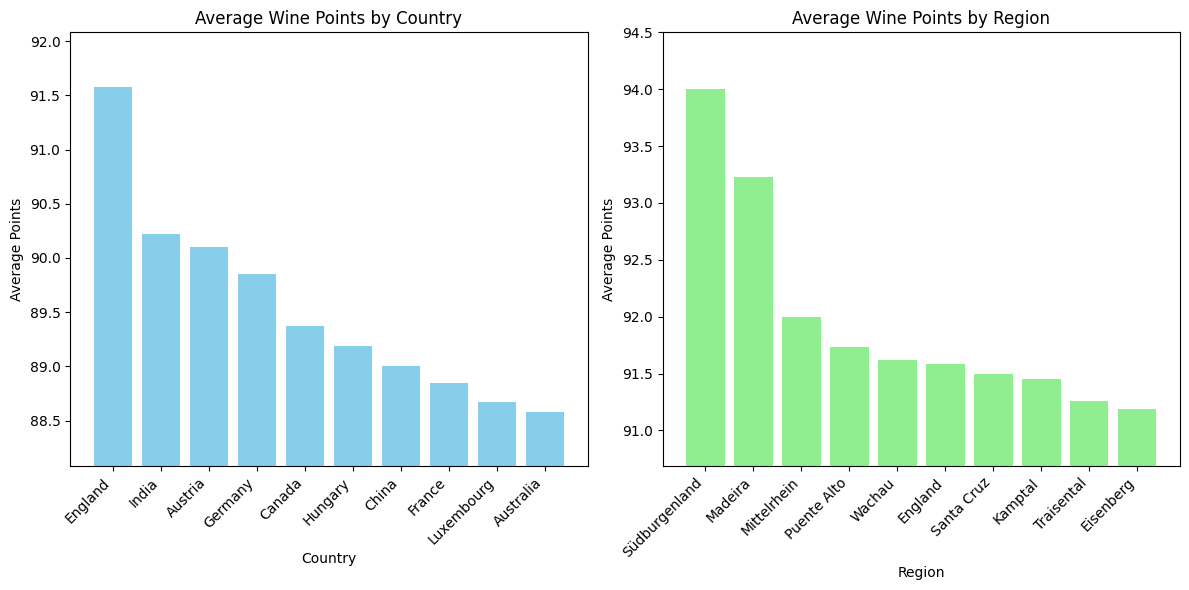

ANALYSIS:

In the first visualization 'Top Ten Wineries by Positivity Score', the variety or type of grape Gilles Morat places highest in sentiment analysis of customer reviews. This is a grape that is particularly known from the region Bordeaux. Speaking of Bordeaux, located in France, both the region and country have a market share and value as well as a high number of reviews which only bolsters the high reviews that wines from France have gotten. These claims all linked together and are supported by visualizations, 'Wine Reviews by Country', 'Wine Reviews by Region', 'Estimated Market Size by Country', 'Estimated Market Size by Province [region]', 'Top 10 Wine Varieties by Average Rating' and 'Wine Reviews by Country' respectively. These are all sourced from 5 figures, but are 6 visualizations in total that support the claim that anything related to France is a safe bet for opening a new winery. So conclusively, in order to have the best balance of market size, reputation, profitablilty, consumer interests and competitive positioning, I would recommend France as a country, Bordeaux as a region and Gilles Morat for the variety.